<h1 align="center">Parsing with Context Free Grammars(CFG) and PCFG (Probabilistic CFG)</h1> 

<h3>1. Context Free Grammars</h3>

- Let's consider a simple grammar. By convention, the left-hand-side of the first production is the start-symbol of the grammar, typically S, and all well-formed trees must have this symbol as their root label.
-  In NLTK, context-free grammars are defined in the nltk.grammar module.
- Steps
    - Import ntk
    - Create grammar
    - Parse the string
    - Print the parse tree
- Following is an example taken from NLTK-book

1 Parse trees : 


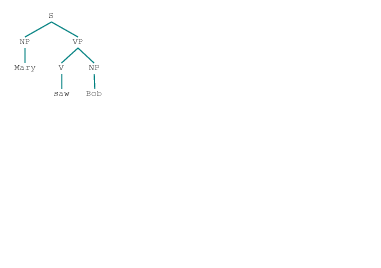

In [1]:
#code snippet taken from http://www.nltk.org/book/

import nltk
grammar1 = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")
sent = "Mary saw Bob".split()
parser = nltk.ChartParser(grammar1)

#showing parsed trees

num_of_parse = len(list(parser.parse(sent)))

print(num_of_parse,"Parse trees : ")

from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

import os
from IPython.display import Image
from IPython.display import display


c =0
for tree in parser.parse(sent):
    cf = CanvasFrame()
    t = Tree.fromstring(str(tree))
    tc = TreeWidget(cf.canvas(),t)
    cf.add_widget(tc,10,10) # (10,10) offsets
    cf.print_to_file('tree'+str(c)+'.ps')
    cf.destroy()
    
    os.system('convert tree'+str(c)+'.ps tree'+str(c)+'.png')
    
    display(Image(filename='./tree'+str(c)+'.png'))
    
    c+=1

<h3>Another example with address parsing</h3>

- We want to parse home addresses using CFG. Address consists of 2 lines of addresses containing house number, street/road/avenue,floor number, region (north,east,south,west), and other details.
- Here we have used a regular expression-tagger to tag the sequence of words in the address lines with tags such as 'NUM', 'STREET', etc.
- For example,
                'suite' and 'Suite' are tagged to 'SUITE'
                'floor' and 'Floor' are tagged to 'FLOOR'
                 sequence of number is tagged as 'NUM'
- A CFG can be formed as follows, for the address "525 N. Main Street , Suite 28" as input:

1 Parse trees : 


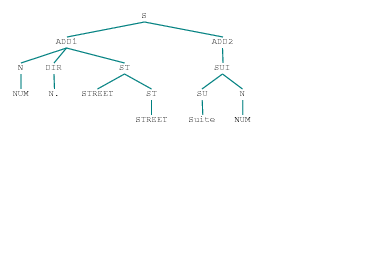

In [2]:
import nltk
grammar1 = nltk.CFG.fromstring("""
S -> ADD1 ADD2 | ADD1
ADD1 -> N DIR ST | ST | N DIR
ADD2 -> FL ST | FL | SUI | SUI FL | SUI FL ST | FL SUI 
N -> 'NUM'
DIR -> 'N.' | 'S.' | 'W.'|'E.'|'North'|'South'|'West'|'East'|'N'|'S'|'E'|'W'
ST -> 'STREET' ST | 'STREET'
SUI -> SU N
FL -> N SS F | N F
F -> 'FLOOR'
SU -> 'SUITE' | 'Suite'
SS -> 'SUP'
""")
pattern = [(r'[0-9]+','NUM'),(r'^(?!(N|W|E|S|N.|S.|W.|E.|West|North|East|,|South|Suite|Floor|floor|nd|st|th)$).*','STREET'),(r'(Suite,suite)+','SUITE'),(r'(nd|st|th)','SUP'),(r'(floor|Floor)','FLOOR'),(r',','COM')]
tagger = nltk.RegexpTagger(pattern)

t=[]
#print(tagger.tag(nltk.word_tokenize('525 N. Main Street , Suite 28')))
for (y,x) in (tagger.tag(nltk.word_tokenize('525 N. Main Street , Suite 28'))):
	if x is not None and x != 'COM':
		t.append(x)
	elif x is None :
		t.append(y)
#print (t)
parser = nltk.ChartParser(grammar1)

#showing parsed trees

num_of_parse = len(list(parser.parse(t)))

print(num_of_parse,"Parse trees : ")

from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

import os
from IPython.display import Image
from IPython.display import display


c =0
for tree in parser.parse(t):
    cf = CanvasFrame()
    t = Tree.fromstring(str(tree))
    tc = TreeWidget(cf.canvas(),t)
    cf.add_widget(tc,10,10) # (10,10) offsets
    #Saving output in form of .ps file
    cf.print_to_file('tree'+str(c)+'.ps')
    cf.destroy()
    #Saving output of tree as .png file and loading it in next step
    os.system('convert tree'+str(c)+'.ps tree'+str(c)+'.png')
    
    display(Image(filename='./tree'+str(c)+'.png'))
    
    c+=1

- Parsing is performed using this tagged sequence only.

<h3>2.1 A modified cfg</h3>
<pre>
Following grammar is the extension of the above grammer having fields: name, address_line_1, address_line_2,  city, state, country and zip.
Regex Tagger is also updated accordingly.
Out of 13078 addresses, 7541 are being parsed properly.
Strings like "<b>773-702-7034 Carl Sandburg Middle School , 855 W. Hawley Street , LOCATED IN THE GYM ,Mundelein, IL , us , 60060</b>" is not parsed by the following grammar because "<b>773-702-7034</b>" format is not taken in number tag.
</pre>

In [3]:
%%time
import nltk
grammar1 = nltk.CFG.fromstring("""
S ->  N NM ADD1 ADD2 CT STATE COUNTRY Z |NM ADD1 ADD2 CT STATE COUNTRY Z| NM ADD1 CT STATE COUNTRY Z
NM -> 'NAME' NM | 'NAME' 'NUM' NM | 'NAME' 'NUM' | 'NAME'
ADD1 -> N DIR ST | ST | N DIR | N DIR AVE | AVE | N AVE | N ST |AVE N| ST N | AVE DIR |ST DIR | AVE DIR AVE| AVE DIR AVE |ST DIR ST |AVE N AVE | ST N ST | N DIR N SS AVE |N DIR N SS ST | N DIR N SS AVE |N DIR N SS ST |  DIR AVE |DIR ST
ADD2 -> FL ST1 | FL | SUI | SUI FL | SUI FL ST1 | FL SUI | DIR ST1 |N DIR ST1 | ST1 | N DIR | N ST1 | N SS ST1 | ST1 N |ST1 DIR ST1 | 'NUM'
N -> 'NUM' 
CT -> 'CITY' | 'CITY' 'CITY' | 'CITY' 'CITY' 'CITY'
STATE -> 'STATE' | STATE 'STATE'
Z -> 'ZIP'
COUNTRY -> 'COUNTRY'| COUNTRY 'COUNTRY'|'us'|'US'
DIR -> 'N.' | 'S.' | 'W.'|'E.'|'North'|'South'|'West'|'East'|'N'|'S'|'E'|'W'|'w.'|'s.'|'n.'|'e.'
ST -> 'STREET1' ST | 'STREET1' 'NUM' | 'STREET1' 'NUM' ST| 'STREET1'
AVE -> 'AVENUE' AVE | 'AVENUE'
ST1 -> 'STREET2' ST1 | 'STREET2'
SUI -> SU N
FL -> N SS F | N F | OTH F | F N SS
OTH -> 'Top' | 'Main'
F -> 'FLOOR'
SU -> 'SUITE'
SS -> 'SUP'
""")
	
pattern = [(r'^(?!(?:^[0-9][0-9][0-9][0-9][0-9]+$)$)\d+','NUM'),(r'^(?!(?:^[0-9][0-9][0-9][0-9][0-9]+$)|(\(|\)|us|US|N\.|W\.|E\.|S\.|N|W|E|S|n\.|w\.|e\.|s\.|Ave|Ave\.|ave|avenue|Avenue|AVENUE|ave\.|,|Suite|suite|SUITE|Floor|Fl.|Fl|floor|nd|th)$).*','STREET1'),(r'(Suite|suite|SUITE)','SUITE'),(r'(nd|th)','SUP'),(r'(floor|Fl.|Fl|Floor)','FLOOR'),(r',','COM'),(r'\(|\)','BRAC'),(r'Ave|Ave.|ave|avenue|Avenue|AVENUE|ave.','AVENUE'),(r'^[0-9][0-9][0-9][0-9][0-9]+$','ZIP')]

f = open("data/all_addr.csv",encoding="utf-8")

count = 0
total_count = 0
for line in f:
    adr1 = line
    #print(adr1)
    tagger = nltk.RegexpTagger(pattern)
    #adr1 = 'Miguel , private location , details to be emailed to those attending , Evanston , IL , us , 60202'
    t=[]
    f=0
    p=0
    start=0
    end=0
    for (y,x) in (tagger.tag(nltk.word_tokenize(adr1))):
        if x is not None and x != 'COM' and x != 'BRAC' and f==0:	
            if x is 'STREET1' :
                x='NAME'
            t.append(x)
        elif x is not None and x != 'COM' and x != 'BRAC' and f==1:
            t.append(x)
        elif x is not None and x != 'COM' and x != 'BRAC' and f==2:	
            if x is 'STREET1' :
                x='STREET2'
            t.append(x)
        elif x is not None and x != 'COM' and x != 'BRAC' and f==3:	
            if x is 'STREET1' :
                x='CITY'
            t.append(x)
        elif x is not None and x != 'COM' and x != 'BRAC' and f==4:	
            if x is 'STREET1' :
                x='STATE'
            t.append(x)
        elif x is not None and x != 'COM' and x != 'BRAC' and f==5:	
            if x is 'STREET1' :
                x='COUNTRY'
            t.append(x)     
        elif x is not None and x != 'COM' and x != 'BRAC' and f==6:	
            t.append(x)		
        elif x == 'COM' :
            f+=1
        elif x is None  :
            t.append(y)
    if 'AVENUE' in t :
        p=1
    if p==1:
        for index, item in enumerate(t):
            if 'STREET1' in item :
                start=index
                break
        for index, item in enumerate(t):
            if 'AVENUE' in item :
                end=index
                break
        for i in range(start,end) :
            t[i]='AVENUE'



    #print(t)

    parser = nltk.ChartParser(grammar1)
    num_of_parse = len(list(parser.parse(t)))

    #print(num_of_parse)

    if num_of_parse>0:
        count += 1
    total_count += 1

    #for tree in parser.parse(t):
        #tree.draw()

print("Parsed : ",count,"/",total_count)
print("Accuracy : ",(count/total_count)*100.0)


Parsed :  7541 / 13078
Accuracy :  57.66172197583729
CPU times: user 1min 40s, sys: 4 ms, total: 1min 40s
Wall time: 1min 40s


<h3>Ambiguity in Grammar</h3>
<pre>
There are several addresses which lead to more than one parse tree, after being parsed by the above grammar.
Here is an example of an ambiguity taking "<b>Harold Washington Library Center , 400 S. State Street , Cindy Pritzker Auditorium , Chicago , IL , us , 60605</b>" as input.
</pre>

In [2]:
import nltk

adr1 = 'Harold Washington Library Center , 400 S. State Street , Cindy Pritzker Auditorium , Chicago , IL , us , 60605'
grammar1 = nltk.CFG.fromstring("""
S ->  N NM ADD1 ADD2 CT STATE COUNTRY Z |NM ADD1 ADD2 CT STATE COUNTRY Z| NM ADD1 CT STATE COUNTRY Z
NM -> 'NAME' NM | 'NAME' 'NUM' NM | 'NAME' 'NUM' | 'NAME'
ADD1 -> N DIR ST | ST | N DIR | N DIR AVE | AVE | N AVE | N ST |AVE N| ST N | AVE DIR |ST DIR | AVE DIR AVE| AVE DIR AVE |ST DIR ST |AVE N AVE | ST N ST | N DIR N SS AVE |N DIR N SS ST | N DIR N SS AVE |N DIR N SS ST |  DIR AVE |DIR ST
ADD2 -> FL ST1 | FL | SUI | SUI FL | SUI FL ST1 | FL SUI | DIR ST1 |N DIR ST1 | ST1 | N DIR | N ST1 | N SS ST1 | ST1 N |ST1 DIR ST1 | 'NUM'
N -> 'NUM' 
CT -> 'CITY' | 'CITY' 'CITY' | 'CITY' 'CITY' 'CITY'
STATE -> 'STATE' | STATE 'STATE'
Z -> 'ZIP'
COUNTRY -> 'COUNTRY'| COUNTRY 'COUNTRY'|'us'|'US'
DIR -> 'N.' | 'S.' | 'W.'|'E.'|'North'|'South'|'West'|'East'|'N'|'S'|'E'|'W'|'w.'|'s.'|'n.'|'e.'
ST -> 'STREET1' ST | 'STREET1' 'NUM' | 'STREET1' 'NUM' ST| 'STREET1'
AVE -> 'AVENUE' AVE | 'AVENUE'
ST1 -> 'STREET2' ST1 | 'STREET2'
SUI -> SU N
FL -> N SS F | N F | OTH F | F N SS
OTH -> 'Top' | 'Main'
F -> 'FLOOR'
SU -> 'SUITE'
SS -> 'SUP'
""")
	
pattern = [(r'^(?!(?:^[0-9][0-9][0-9][0-9][0-9]+$)$)\d+','NUM'),(r'^(?!(?:^[0-9][0-9][0-9][0-9][0-9]+$)|(\(|\)|us|US|N\.|W\.|E\.|S\.|N|W|E|S|n\.|w\.|e\.|s\.|Ave|Ave\.|ave|avenue|Avenue|AVENUE|ave\.|,|Suite|suite|SUITE|Floor|Fl.|Fl|floor|nd|th)$).*','STREET1'),(r'(Suite|suite|SUITE)','SUITE'),(r'(nd|th)','SUP'),(r'(floor|Fl.|Fl|Floor)','FLOOR'),(r',','COM'),(r'\(|\)','BRAC'),(r'Ave|Ave.|ave|avenue|Avenue|AVENUE|ave.','AVENUE'),(r'^[0-9][0-9][0-9][0-9][0-9]+$','ZIP')]
tagger = nltk.RegexpTagger(pattern)

t=[]
f=0
p=0
start=0
end=0
for (y,x) in (tagger.tag(nltk.word_tokenize(adr1))):
    if x is not None and x != 'COM' and x != 'BRAC' and f==0:	
        if x is 'STREET1' :
            x='NAME'
        t.append(x)
    elif x is not None and x != 'COM' and x != 'BRAC' and f==1:
        t.append(x)
    elif x is not None and x != 'COM' and x != 'BRAC' and f==2:	
        if x is 'STREET1' :
            x='STREET2'
        t.append(x)
    elif x is not None and x != 'COM' and x != 'BRAC' and f==3:	
        if x is 'STREET1' :
            x='CITY'
        t.append(x)
    elif x is not None and x != 'COM' and x != 'BRAC' and f==4:	
        if x is 'STREET1' :
            x='STATE'
        t.append(x)
    elif x is not None and x != 'COM' and x != 'BRAC' and f==5:	
        if x is 'STREET1' :
            x='COUNTRY'
        t.append(x)     
    elif x is not None and x != 'COM' and x != 'BRAC' and f==6:	
        t.append(x)		
    elif x == 'COM' :
        f+=1
    elif x is None  :
        t.append(y)
if 'AVENUE' in t :
    p=1
if p==1:
    for index, item in enumerate(t):
        if 'STREET1' in item :
            start=index
            break
    for index, item in enumerate(t):
        if 'AVENUE' in item :
            end=index
            break
    for i in range(start,end) :
        t[i]='AVENUE'

parser = nltk.ChartParser(grammar1)


num_of_parse = len(list(parser.parse(t)))

print(num_of_parse,"Parse trees : ")

from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

import os
from IPython.display import Image
from IPython.display import display


c =0
for tree in parser.parse(t):
    cf = CanvasFrame()
    t = Tree.fromstring(str(tree))
    tc = TreeWidget(cf.canvas(),t)
    cf.add_widget(tc,10,10) # (10,10) offsets
    cf.print_to_file('tree'+str(c)+'.ps')
    cf.destroy()
    
    os.system('convert tree'+str(c)+'.ps tree'+str(c)+'.png')
    
    display(Image(filename='./tree'+str(c)+'.png'))
    
    c+=1

0 Parse trees : 


<h3>3. CYK algorithm</h3>

- CYK is a parsing algorithm for context-free grammars which employs bottom-up parsing and dynamic programming.
- The standard version of CYK operates only on context-free grammars given in Chomsky normal form (CNF). However any context-free grammar may be transformed to a CNF grammar expressing the same language.
- In formal language theory, a grammar is said to be in Chomsky Norma Form(CNF) if all of its productions are of the form:
    - A -> BC
    - A -> a
    - S -> null
    where, where A, B, and C are nonterminal symbols, a is a terminal symbol (a symbol that represents a constant value), S is the start symbol, and ε denotes the empty string.
- The importance of the CYK algorithm stems from its high efficiency in certain situations. The worst case running time of CYK is O((n^3)*|G|), where n is the length of the parsed string and |G| is the size of the CNF grammar G (Hopcroft & Ullman 1979, p. 140). This makes it one of the most efficient parsing algorithms in terms of worst-case asymptotic complexity.

<a href="http://www.tutorialspoint.com/automata_theory/chomsky_normal_form.htm">Useful resource on CNF conversion</a>

<h3>3.1 Example</h3>
<p>The example shows implementation of a CYK algorithm.<br>
Parsing is performed on simple string: "the kids opened the box on the floor".<br>
Parsing is also peformed using Prbabilistic CFG in which each prouction is assigned a probability. So in case of unambiguous grammars in which more then one productions with same darivations are possible, probability is given to the highest production.</p>
</pre>

In [5]:
# code snippet taken from http://www.cs.pomona.edu/classes/cs181NLP/lectures/Lec11/Lec11.pdf
import IPython
from IPython.display import HTML, display

tokens = ["the", "kids", "opened", "the", "box", "on", "the", "floor"]
# grammar is in CNF form for CYK algorithm
grammar = nltk.PCFG.fromstring("""
S -> NP VP [1.0]
PP -> P NP [1.0]
NP -> Det N [0.4] | NP PP [0.6]
VP -> V NP [0.5] | VP PP [0.5]
Det -> 'the' [1.0]
N -> 'kids' [0.4] | 'box' [0.3] | 'floor' [0.3]
V -> 'opened' [1.0]
P -> 'on' [1.0]
X -> 'kids' [1.0]
""")
                               
def init_wfst(tokens, grammar):
    numtokens = len(tokens)    
    
    wfst = [["-" for i in range(numtokens+1)] for j in range(numtokens+1)]
    
    # fill in diagonal
    for i in range(numtokens):
        productions = grammar.productions(rhs=tokens[i])
        print(productions)
        temp = ""
        for prod in productions:
            temp += str(prod.lhs()) + ' ['+ str(prod.prob()) +' ]</br>'
        wfst[i][i+1] = temp
    
    return wfst

def complete_wfst(wfst, tokens, trace=False):
    index = {}
    for prod in grammar.productions(): #make reverse lookup
        index[prod.rhs()] = prod.lhs()
    numtokens = len(tokens)
    for span in range(2, numtokens+1):
        for start in range(numtokens+1-span): #go down diagonal
            end = start + span
            for mid in range(start+1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if (nt1,nt2) in index:
                    if trace:
                        '''
                        format : 
                            [ i ] NT_RHS1 [ k ] NT_RHS2 [ j ] ==> [ PROD_NUM ] NT_LHS [ j ]
                        
                            It means
                                NT_RHS1 can derive string (i,k]
                                NT_RHS2 can derive string (k,j]
                                
                                Using NT_RHS1 and NT_RHS2 procuction number PROD_NUM can derive NT_LHS and string (i,j] which is of the form
                                    NT_LHS -> NT_RHS1 NT_RHS2
                            
                        '''
                        print( "[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" %(start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
                    wfst[start][end] = index[(nt1,nt2)]
    return wfst 

def display(wfst, tokens):
    print('\nWFST\t' + '\t'.join([("%-4d" % i) for i in range(1, len(wfst))]))
    for i in range(len(wfst)-1):
        print("%d\t" % i,end="")
        for j in range(1, len(wfst)):
            print("%-4s\t" % wfst[i][j],end="")
        print()

wfst = init_wfst(tokens, grammar)
wfst = complete_wfst(wfst, tokens, trace=False)
#display(wfst, tokens)

wfst[0][0] = "TABLE :P"
for x in range(0,len(wfst)):
    wfst[x][0] = str(x)
    
wfst = wfst[:-1]
temp = []
for i in range(len(tokens)):
    temp.append(tokens[i]+"[%d]"%(i+1))
temp.insert(0,'TABLE')

wfst.insert(0,temp)
        

IPython.display.display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in wfst)
        )
 ))

[Det -> 'the' [1.0]]
[N -> 'kids' [0.4], X -> 'kids' [1.0]]
[V -> 'opened' [1.0]]
[Det -> 'the' [1.0]]
[N -> 'box' [0.3]]
[P -> 'on' [1.0]]
[Det -> 'the' [1.0]]
[N -> 'floor' [0.3]]


TABLE,the[1],kids[2],opened[3],the[4],box[5],on[6],the[7],floor[8]
0,Det [1.0 ],-,-,-,-,-,-,-
1,-,N [0.4 ]X [1.0 ],-,-,-,-,-,-
2,-,-,V [1.0 ],-,-,-,-,-
3,-,-,-,Det [1.0 ],-,-,-,-
4,-,-,-,-,N [0.3 ],-,-,-
5,-,-,-,-,-,P [1.0 ],-,-
6,-,-,-,-,-,-,Det [1.0 ],-
7,-,-,-,-,-,-,-,N [0.3 ]


<h3>3.2 Applying above CYK algorithm to parse address:</h3>

In [6]:
from IPython.display import HTML, display

adr1 = "Miguel , private location , details to be emailed to those attending , Evanston , IL , us , 60202"

grammar1 = \
    nltk.CFG.fromstring("""
S -> NM X1 | NM X6
X6 -> ADD1 X3
X1 -> ADD1 X2
X2 -> ADD2 X3
X3 -> CT X4
X4 -> STATE X5
X5 -> COUNTRY Z
NM -> X7 NM | X7 X8 | X7 N | 'NAME'
X7 -> 'NAME'
X8 -> N NM 
ADD1 -> X9 ST | ST STREET1 | 'STREET1' | N DIR | X9 AVE | AVENUE AVE | 'AVENUE' | N ST
X9 -> N DIR
ADD2 -> FL ST1 | X11 F | N F | OTH F | F X11 | SU N | SUI FL | SUI X13 | FL SUI | DIR ST1 | N X14 | STREET2 ST1 | 'STREET2' | N DIR | N ST1 | N X15 | ST1 N |ST1 X16 | 'NUM'
X16 -> DIR ST1
X15 -> SS ST1
X14 -> DIR ST1
X13 -> FL ST1
N -> 'NUM' 
CITY -> 'CITY'
CT -> 'CITY' | CITY CITY
STATE -> 'IL'
Z -> 'ZIP'
COUNTRY -> 'us' | 'US'
DIR -> 'N.' | 'S.' | 'W.'|'E.'|'North'|'South'|'West'|'East'|'N'|'S'|'E'|'W'|'w.'|'s.'|'n.'|'e.'
STREET1 -> 'STREET1'
ST -> STREET1 ST | STREET1 N | STREET1 X10 | 'STREET1'
X10 -> N ST
AVE -> AVENUE AVE | 'AVENUE'
AVENUE -> 'AVENUE'
STREET2 ->	'STREET2'
ST1 -> STREET2 ST1 | 'STREET2'
SUI -> SU N
FL -> X11 F | N F | OTH F | F X11
X11 -> N SS
OTH -> 'Top' | 'Main'
F -> 'FLOOR'
SU -> 'SUITE'
SS -> 'SUP'
""")

pattern = [(r'^(?!(?:^6[0-9]{4,4}$)$)\d+','NUM'),(r'^(?!(?:^6[0-9]{4,4}$)|(\(|\)|IL|us|US|N\.|W\.|E\.|S\.|N|W|E|S|n\.|w\.|e\.|s\.|Ave|Ave\.|ave|avenue|Avenue|AVENUE|ave\.|West|North|East|,|South|Suite|suite|SUITE|Floor|Fl.|Fl|floor|nd|th)$).*','STREET1'),(r'(Suite|suite|SUITE)','SUITE'),(r'(nd|th)','SUP'),(r'(floor|Fl.|Fl|Floor)','FLOOR'),(r',','COM'),(r'\(|\)','BRAC'),(r'Ave|Ave.|ave|avenue|Avenue|AVENUE|ave.','AVENUE'),(r'^6[0-9]{4,4}$','ZIP')]
tagger = nltk.RegexpTagger(pattern)
    
t = []
f = 0
p = 0
start = 0
end = 0
for (y, x) in tagger.tag(nltk.word_tokenize(adr1)):
    if x is not None and x != 'COM' and x != 'BRAC' and f == 0:
        if x == 'STREET1':
            x = 'NAME'
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 1:
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 2:
        if x == 'STREET1':
            x = 'STREET2'
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 3:
        if x == 'STREET1':
            x = 'CITY'
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 6:
        t.append(x)
    elif x == 'COM':
        f += 1
    elif x == None:
        t.append(y)

if 'AVENUE' in t:
    p = 1

if p == 1:
    for (index, item) in enumerate(t):
        if 'STREET1' in item:
            start = index
            break
    for (index, item) in enumerate(t):
        if 'AVENUE' in item:
            end = index
            break
    for i in range(start, end):
        t[i] = 'AVENUE'

tokens = t
grammar = grammar1
    
size = len(tokens)

#creating table
table = [ [[] for i in range(size)] for i in range(size) ]

#creating production lookup dictionary
lookup = {}
for prod in grammar.productions():
    if prod.rhs() in lookup:
        lookup[prod.rhs()] += [prod.lhs()]
    else:
        lookup[prod.rhs()] = [prod.lhs()]
    
#filling diagonal
for i in range(len(tokens)):
    prods = grammar.productions(rhs=tokens[i])
    table[i][i]= [x.lhs() for x in prods]

#filling rest of table with cyk algorithm
for i in range(2,size+1):
    for j in range(size-i+1):
        
        for k in range(j,j+i-1):
            
            nt1, nt2 = table[j][k], table[k+1][j+i-1]
            currentNts = []
            
            if nt1 and nt2:
                for p1 in nt1:
                    for p2 in nt2:
                        
                        if (p1,p2) in lookup:
                            currentNts.extend(lookup[(p1,p2)])
            table[j][j+i-1] += currentNts
            
IPython.display.display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
        )
 ))

"[NM, X7]",[],[],[],[],[],[],[],[],[],[],[],[],[S]
[],"[ADD1, STREET1, ST]","[ST, ADD1]",[],[],[],[],[],[],[],[],[],[],[X1]
[],[],"[ADD1, STREET1, ST]",[],[],[],[],[],[],[],[],[],[],[X1]
[],[],[],"[ADD2, STREET2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]",[],[],[],[X2]
[],[],[],[],"[ADD2, STREET2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]",[],[],[],[X2]
[],[],[],[],[],"[ADD2, STREET2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]",[],[],[],[X2]
[],[],[],[],[],[],"[ADD2, STREET2, ST1]","[ADD2, ST1]","[ADD2, ST1]","[ADD2, ST1]",[],[],[],[X2]
[],[],[],[],[],[],[],"[ADD2, STREET2, ST1]","[ADD2, ST1]","[ADD2, ST1]",[],[],[],[X2]
[],[],[],[],[],[],[],[],"[ADD2, STREET2, ST1]","[ADD2, ST1]",[],[],[],[X2]
[],[],[],[],[],[],[],[],[],"[ADD2, STREET2, ST1]",[],[],[],[X2]
[],[],[],[],[],[],[],[],[],[],"[CITY, CT]",[],[],[X3]


<h3>3.3 Applying above CYK algorithm to parse address with PCFG (Probabilistic CFG):</h3>
<pre>Where a normal CFG parser gives us two parse trees for the address "<b>Harold Washington Library Center , 400 S. State Street , Cindy Pritzker Auditorium , Chicago , IL , us , 60605</b>" , a PCFG parser can give us the most probable parse, based on multiplying the probabilities of the rules necessary for the derivation of each parse. This makes for a more accurate natural language understander.
</pre>

In [7]:
from IPython.display import HTML, display

adr1 = "Harold Washington Library Center , 400 S. State Street , Cindy Pritzker Auditorium , Chicago , IL , us , 60605"
grammar1 = \
    nltk.PCFG.fromstring("""
S -> NM X1 [0.6] | NM X6 [0.4]
X6 -> ADD1 X3 [1.0]
X1 -> ADD1 X2 [1.0]
X2 -> ADD2 X3 [1.0]
X3 -> CT X4 [1.0]
X4 -> STATE X5 [1.0]
X5 -> COUNTRY Z [1.0]
NM -> X7 NM [0.4] | X7 X8 [0.1] | X7 N [0.2] | 'NAME' [0.3]
X7 -> 'NAME' [1.0]
X8 -> N NM [1.0]
ADD1 -> X9 ST [0.3] | ST STREET1 [0.25] | 'STREET1' [0.1] | N DIR [0.1] | X9 AVE [0.05] | AVENUE AVE [0.1]| 'AVENUE' [0.06]| N ST [0.04]
X9 -> N DIR [1.0]
ADD2 -> FL ST1 [0.1]| X11 F [0.033]| N F [0.067]| OTH F [0.1]| F X11 [0.1]| SU N [0.1]| SUI FL [0.1]| SUI X13 [0.05]| FL SUI [0.05]| DIR ST1 [0.02]| N X14 [0.04]| STREET2 ST1 [0.04]| 'STREET2' [0.01]| N DIR [0.04]| N ST1 [0.05]| N X15 [0.01]| ST1 N [0.02]|ST1 X16 [0.02]| 'NUM' [0.05]
X16 -> DIR ST1 [1.0]
X15 -> SS ST1 [1.0]
X14 -> DIR ST1 [1.0]
X13 -> FL ST1 [1.0]
N -> 'NUM' [1.0]
CITY -> 'CITY' [1.0]
CT -> 'CITY' [0.4] | CITY CITY [0.6]
STATE -> 'IL' [1.0]
Z -> 'ZIP' [1.0]
COUNTRY -> 'us' [0.7] | 'US' [0.3]
DIR -> 'N.' [0.1]| 'S.'[0.1] | 'W.' [0.1] |'E.' [0.1] |'North' [0.05] |'South' [0.05] |'West' [0.05]|'East' [0.05]|'N' [0.05] |'S' [0.05]|'E' [0.05] |'W' [0.05]|'w.' [0.05]|'s.' [0.05] |'n.' [0.05] |'e.' [0.05]
STREET1 -> 'STREET1' [1.0]
ST -> STREET1 ST [0.3] | STREET1 N [0.2]| STREET1 X10 [0.2]| 'STREET1' [0.3]
X10 -> N ST [1.0]
AVE -> AVENUE AVE [0.6] | 'AVENUE' [0.4]
AVENUE -> 'AVENUE' [1.0]
STREET2 ->	'STREET2' [1.0]
ST1 -> STREET2 ST1 [0.6] | 'STREET2' [0.4]
SUI -> SU N [1.0]
FL -> X11 F [0.3] | N F [0.2] | OTH F [0.2] | F X11 [0.3]
X11 -> N SS [1.0]
OTH -> 'Top' [0.5] | 'Main' [0.5]
F -> 'FLOOR' [1.0]
SU -> 'SUITE' [1.0]
SS -> 'SUP' [1.0]
""")

pattern = [(r'^(?!(?:^6[0-9]{4,4}$)$)\d+','NUM'),(r'^(?!(?:^6[0-9]{4,4}$)|(\(|\)|IL|us|US|N\.|W\.|E\.|S\.|N|W|E|S|n\.|w\.|e\.|s\.|Ave|Ave\.|ave|avenue|Avenue|AVENUE|ave\.|West|North|East|,|South|Suite|suite|SUITE|Floor|Fl.|Fl|floor|nd|th)$).*','STREET1'),(r'(Suite|suite|SUITE)','SUITE'),(r'(nd|th)','SUP'),(r'(floor|Fl.|Fl|Floor)','FLOOR'),(r',','COM'),(r'\(|\)','BRAC'),(r'Ave|Ave.|ave|avenue|Avenue|AVENUE|ave.','AVENUE'),(r'^6[0-9]{4,4}$','ZIP')]
tagger = nltk.RegexpTagger(pattern)
    
t = []
f = 0
p = 0
start = 0
end = 0
for (y, x) in tagger.tag(nltk.word_tokenize(adr1)):
    if x is not None and x != 'COM' and x != 'BRAC' and f == 0:
        if x == 'STREET1':
            x = 'NAME'
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 1:
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 2:
        if x == 'STREET1':
            x = 'STREET2'
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 3:
        if x == 'STREET1':
            x = 'CITY'
        t.append(x)
    elif x != None and x != 'COM' and x != 'BRAC' and f == 6:
        t.append(x)
    elif x == 'COM':
        f += 1
    elif x == None:
        t.append(y)


if 'AVENUE' in t:
    p = 1

if p == 1:
    for (index, item) in enumerate(t):
        if 'STREET1' in item:
            start = index
            break
    for (index, item) in enumerate(t):
        if 'AVENUE' in item:
            end = index
            break
    for i in range(start, end):
        t[i] = 'AVENUE'
            
tokens = t
grammar = grammar1
    
#creating table
size = len(tokens)
table = [ [[] for i in range(size)] for i in range(size) ]

#creating production lookup dictionary
lookup = {}
for prod in grammar.productions():
    if prod.rhs() in lookup:
        lookup[prod.rhs()] += [(prod.lhs(),prod.prob())]
    else:
        lookup[prod.rhs()] = [(prod.lhs(),prod.prob())]

#filling diagonal
for i in range(len(tokens)):
    prods = grammar.productions(rhs=tokens[i])
    table[i][i]= [(x.lhs(),x.prob()) for x in prods]

#filling rest of table with cyk algorithm
for i in range(2,size+1):
    for j in range(size-i+1):
        
        for k in range(j,j+i-1):
            
            nt1, nt2 = table[j][k], table[k+1][j+i-1]
            currentNts = []
            
            if nt1 and nt2:
                for p1 in nt1:
                    for p2 in nt2:                  
                        if (p1[0],p2[0]) in lookup:
                            for o in lookup[(p1[0],p2[0])]:
                                currentNts.append((o[0],p1[1]*p2[1]*o[1]))
            table[j][j+i-1] += currentNts

IPython.display.display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
        )
 ))

"[(NM, 0.3), (X7, 1.0)]","[(NM, 0.12)]","[(NM, 0.048)]","[(NM, 0.019200000000000002)]","[(NM, 0.012800000000000004)]",[],[],[],[],[],[],[],[],[],"[(S, 8.360755199999997e-08)]"
[],"[(NM, 0.3), (X7, 1.0)]","[(NM, 0.12)]","[(NM, 0.048)]","[(NM, 0.03200000000000001)]",[],[],[],[],[],[],[],[],[],"[(S, 2.090188799999999e-07)]"
[],[],"[(NM, 0.3), (X7, 1.0)]","[(NM, 0.12)]","[(NM, 0.08000000000000002)]",[],[],[],[],[],[],[],[],[],"[(S, 5.225471999999998e-07)]"
[],[],[],"[(NM, 0.3), (X7, 1.0)]","[(NM, 0.2)]",[],[],[],[],[],[],[],[],[],"[(S, 1.3063679999999992e-06)]"
[],[],[],[],"[(ADD2, 0.05), (N, 1.0)]","[(ADD1, 0.010000000000000002), (X9, 0.1), (ADD2, 0.004)]","[(ADD1, 0.009)]","[(ADD1, 0.0026999999999999997)]",[],[],[],[],[],[],"[(X1, 7.257599999999997e-06)]"
[],[],[],[],[],"[(DIR, 0.1)]",[],[],[],[],[],[],[],[],[]
[],[],[],[],[],[],"[(ADD1, 0.1), (STREET1, 1.0), (ST, 0.3)]","[(ST, 0.09), (ADD1, 0.075)]",[],[],[],[],[],[],"[(X1, 0.00020159999999999994)]"
[],[],[],[],[],[],[],"[(ADD1, 0.1), (STREET1, 1.0), (ST, 0.3)]",[],[],[],[],[],[],"[(X1, 0.0002688)]"
[],[],[],[],[],[],[],[],"[(ADD2, 0.01), (STREET2, 1.0), (ST1, 0.4)]","[(ADD2, 0.016), (ST1, 0.24)]","[(ADD2, 0.0096), (ST1, 0.144)]",[],[],[],"[(X2, 0.0026879999999999994)]"
[],[],[],[],[],[],[],[],[],"[(ADD2, 0.01), (STREET2, 1.0), (ST1, 0.4)]","[(ADD2, 0.016), (ST1, 0.24)]",[],[],[],"[(X2, 0.00448)]"
[],[],[],[],[],[],[],[],[],[],"[(ADD2, 0.01), (STREET2, 1.0), (ST1, 0.4)]",[],[],[],"[(X2, 0.0028)]"
